In [1]:
#Stwórz model klasyfikujący dla Brain Tumor Data Set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

In [3]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "brain/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["brian_tumor","no_brian"],
    shuffle=True,
    batch_size=32,
    color_mode = "grayscale",
    target_size=(100,100),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["brian_tumor","no_brian"],
    shuffle=True,
    batch_size=32,
    color_mode = "grayscale",
    target_size=(100,100),
    subset="validation"
)

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Conv2D(filters = 12, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 12)        120       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 12)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28812)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               14752256  
                                                                 
 dense_4 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,753,402
Trainable params: 14,753,402
Non-trainable params: 0
__________________________________________

In [10]:
history = model.fit(train_dataset, epochs = EPOCHS, validation_data=(validation_dataset), callbacks = [es])

Epoch 1/100
116/116 [==============================] - 22s 184ms/step - loss: 0.6944 - accuracy: 0.6976 - val_loss: 0.4279 - val_accuracy: 0.8041
Epoch 2/100
116/116 [==============================] - 18s 156ms/step - loss: 0.4308 - accuracy: 0.8028 - val_loss: 0.3733 - val_accuracy: 0.8324
Epoch 3/100
116/116 [==============================] - 17s 151ms/step - loss: 0.3789 - accuracy: 0.8367 - val_loss: 0.3634 - val_accuracy: 0.8346
Epoch 4/100
116/116 [==============================] - 17s 150ms/step - loss: 0.3352 - accuracy: 0.8642 - val_loss: 0.3297 - val_accuracy: 0.8716
Epoch 5/100
116/116 [==============================] - 18s 151ms/step - loss: 0.2926 - accuracy: 0.8758 - val_loss: 0.2472 - val_accuracy: 0.8977
Epoch 6/100
116/116 [==============================] - 18s 153ms/step - loss: 0.2482 - accuracy: 0.8960 - val_loss: 0.2129 - val_accuracy: 0.9032
Epoch 7/100
116/116 [==============================] - 18s 151ms/step - loss: 0.2031 - accuracy: 0.9256 - val_loss: 0.1552 -

In [11]:
img, label = validation_dataset.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 87ms/step


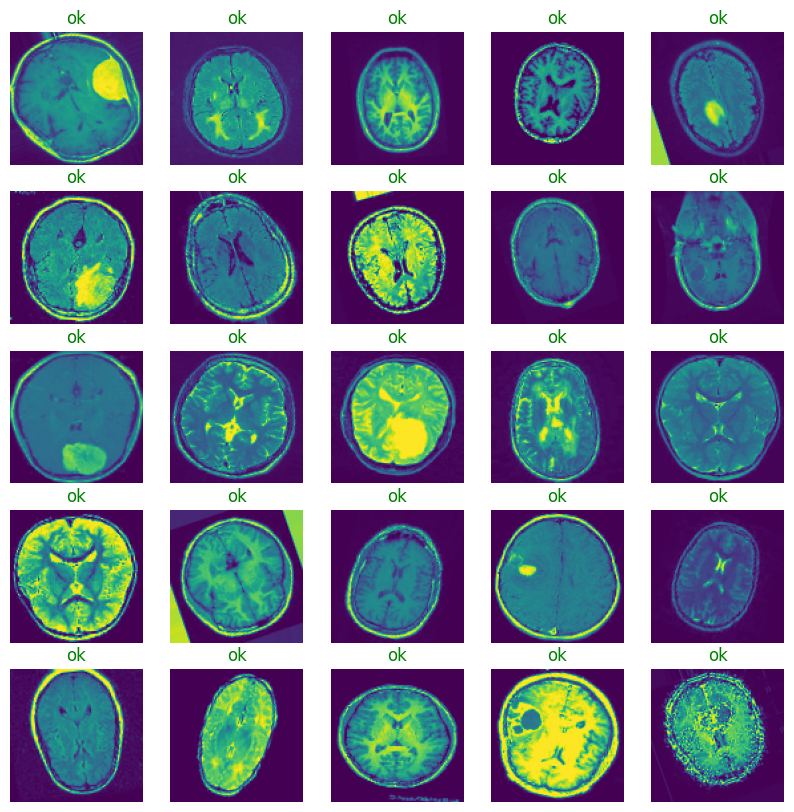

In [12]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    

trochę nie valid dla lekarzy do predykcji, bo zdjęcia są z zupełnie różnych perspektyw 
także ogółem - spoko wykrywanie anomalii na zdjęciach, ale - nie wykrywanie guza

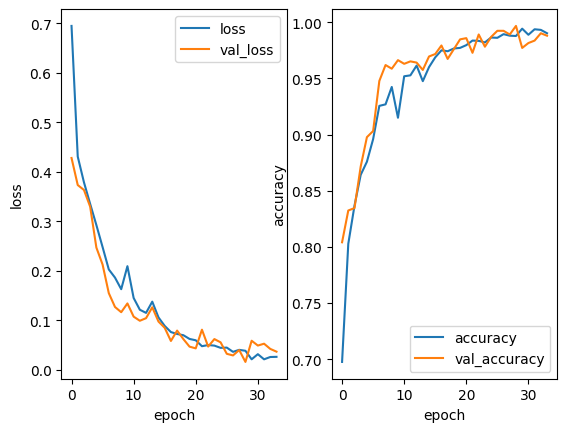

In [13]:
hist = pd.DataFrame(history.history)
hist

plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()